Tutorial for g-h filters

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
measurements = np.random.uniform(160, 170, size=10000)
mean = measurements.mean()
print(f'Average of measurements is {mean:.4f}')


Average of measurements is 164.9844


In [25]:
def gh_filter(data,g,h,x0,dx,dt):
    curr_state = x0
    curr_rate = dx
    estimates = [curr_state]
    predictions = []
    for measure in data:
        # Next Prediction
        curr_state = curr_state + curr_rate*dt
        curr_rate = curr_rate
        predictions.append(curr_state)

        # Next Estimate
        next_state = curr_state + g*(measure-curr_state)
        next_rate = curr_rate + h*(measure-curr_state)/dt
        estimates.append(next_state)

        # Update
        curr_state, curr_rate = next_state,next_rate
    return predictions,estimates



In [27]:
def plot_graph(data,pred,est):
    plt.plot(range(1,len(data)+1),pred,'bo',linestyle='-',label = "Prediction")
    plt.plot(range(len(data)+1),est,'r^',linestyle='-',label ="Estimate")
    plt.legend()
    plt.grid()
    plt.show()

[158.0, 158.70000000000002, 163.46, 163.586, 163.3816, 164.79896, 167.399376, 172.45962559999998, 173.95577536, 174.15346521599997, 177.4920791296, 179.63524747776] [157.0, 157.4, 160.12, 160.192, 160.0752, 160.88512, 162.371072, 165.26264319999999, 166.11758591999998, 166.23055155199998, 168.1383309312, 169.36299855872, 170.65779913523198]


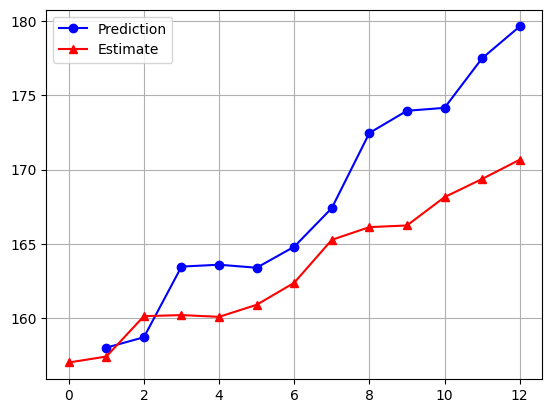

In [30]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day

pred,est = gh_filter(weights,0.4,0.3,157.0,1.0,time_step)

print(pred,est)

plot_graph(weights,pred,est)

